<a href="https://colab.research.google.com/github/pinkesh-ai/PinAi20_CIFAR/blob/main/PinAi20_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
# from pathlib import Path
from fastai.vision.all import *

In [ ]:
#from google.colab import drive **Already mounted you don't need to change the name of the drive
#drive.mount('/content/drive')

In [ ]:
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

--2021-05-11 05:04:35--  http://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/cifar.tgz [following]
--2021-05-11 05:04:35--  https://pjreddie.com/media/files/cifar.tgz
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz’

cifar.tgz           100%[===================>] 160.77M  41.7MB/s    in 4.2s    

2021-05-11 05:04:40 (38.5 MB/s) - ‘cifar.tgz’ saved [168584360/168584360]



In [ ]:
# from google.colab import drive ** Already mounted no need to repeat
# drive.mount('/content/gdrive', force_remount=True)
root_dir = '/content/cifar/train'
base_dir = root_dir + 'cifar'


In [ ]:
path = '/content/cifar/train'

In [ ]:
files = get_image_files("/content/cifar/train")
len(files)

50000

In [ ]:
# option 2 to see number of img inside
fns = get_image_files('/content/cifar/train')
fns

(#50000) [Path('/content/cifar/train/43204_cat.png'),Path('/content/cifar/train/44943_cat.png'),Path('/content/cifar/train/47187_truck.png'),Path('/content/cifar/train/33499_deer.png'),Path('/content/cifar/train/17547_dog.png'),Path('/content/cifar/train/45982_airplane.png'),Path('/content/cifar/train/42540_frog.png'),Path('/content/cifar/train/10589_airplane.png'),Path('/content/cifar/train/14872_ship.png'),Path('/content/cifar/train/46264_dog.png')...]

In [ ]:
# option 2 to see number of img inside
fns = get_image_files('/content/cifar/test')
fns

(#10000) [Path('/content/cifar/test/8286_horse.png'),Path('/content/cifar/test/8292_truck.png'),Path('/content/cifar/test/853_truck.png'),Path('/content/cifar/test/2391_bird.png'),Path('/content/cifar/test/9116_deer.png'),Path('/content/cifar/test/6267_truck.png'),Path('/content/cifar/test/9998_automobile.png'),Path('/content/cifar/test/2514_truck.png'),Path('/content/cifar/test/5059_deer.png'),Path('/content/cifar/test/6524_ship.png')...]

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import torch
import numpy as np

In [ ]:
import pathlib
def label_func(fname):
  df=pathlib.Path(fname).stem.split('_')
  return df[1]

In [ ]:
fns=get_image_files(path)
import pathlib
df=pathlib.Path(fns[0]).stem.split('_')
df[1]

'cat'

In [ ]:
labels = list(set(files.map(label_func)))
len(labels)

10

In [ ]:
files[0].name

'43204_cat.png'

In [ ]:
pat = r'_(.*).png'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

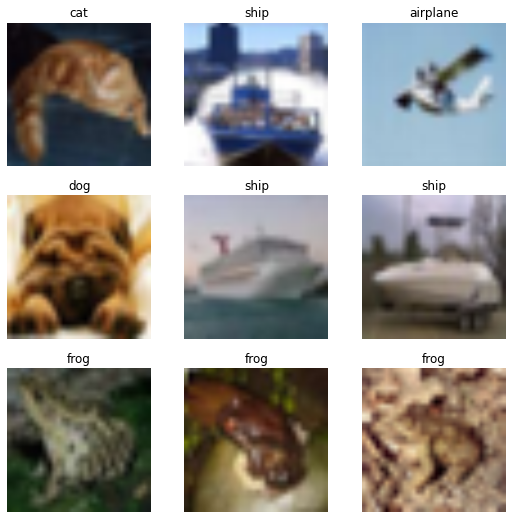

In [ ]:
dls.show_batch()

In [ ]:
#option 1
#dls = ImageDataLoaders.from_df(path, folder='cifers', valid_col='is_valid', label_delim=' ', item_tfms=Resize(224), batch_tfms=aug_transforms(size=224))

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224),
                                    batch_tfms=aug_transforms(size=128))

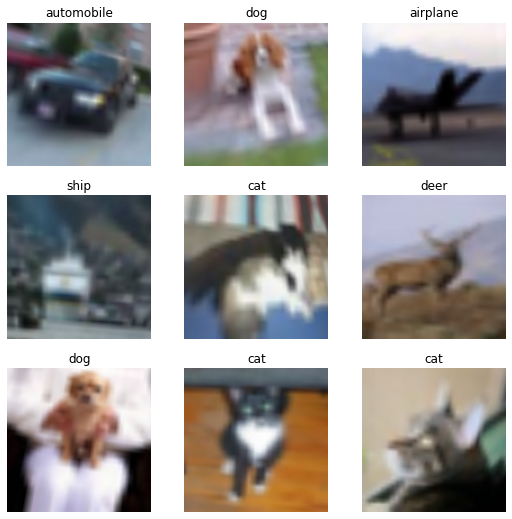

In [ ]:
dls.show_batch()

In [ ]:
def open_image(fname, size=224):
    img = PIL.Image.open(fname).convert('RGB')
    img = img.resize((size, size))
    t = torch.Tensor(np.array(img))
    return t.permute(2,0,1).float()/255.0

In [ ]:
open_image(files[1009]).shape

NameError: ignored

In [ ]:
# didnt try 
splitter=RandomSplitter(valid_pct=0.2, seed=42),

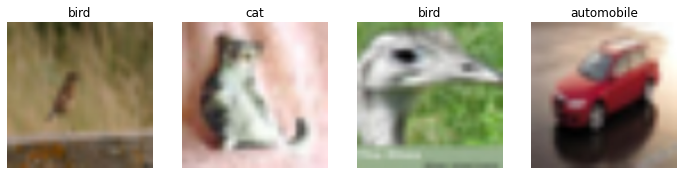

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
failed = verify_images(files)
failed

(#0) []

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.004365158267319202)

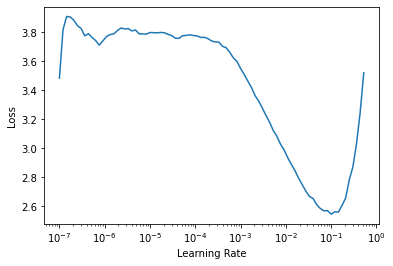

In [ ]:
learn.lr_find()

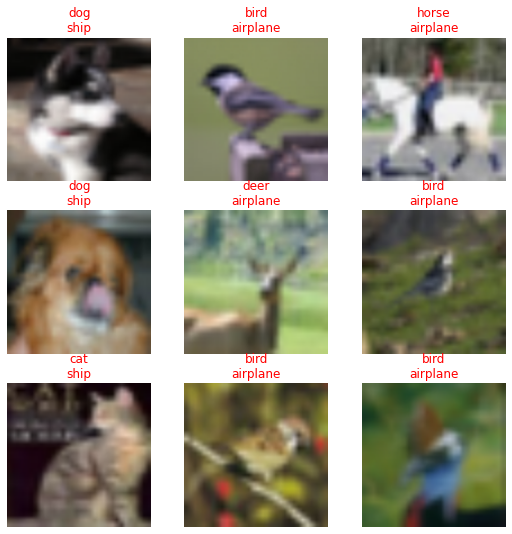

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

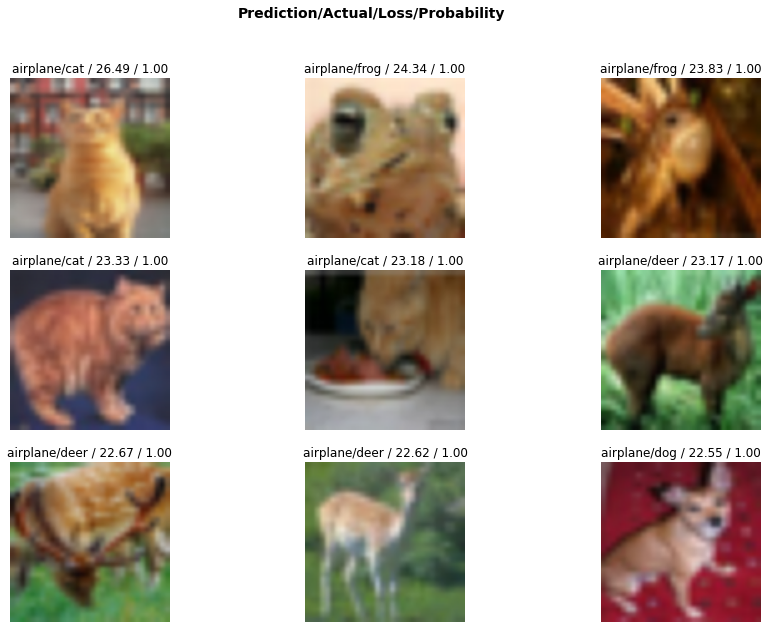

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.542319,0.334913,0.117100,01:47


In [ ]:
learn.fine_tune(3,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.484766,0.342555,0.113300,01:46


epoch,train_loss,valid_loss,error_rate,time
0,0.349727,0.251120,0.085600,01:54
1,0.226305,0.183433,0.062400,01:53
2,0.128247,0.154106,0.051700,01:54


In [ ]:
learn.fine_tune(3,1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.196928,0.205622,0.058200,01:46


epoch,train_loss,valid_loss,error_rate,time
0,0.397295,0.414401,0.126100,01:52
1,0.252693,0.227899,0.076300,01:52
2,0.123414,0.162680,0.054000,01:51


In [ ]:
learn.fine_tune(3,1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.114238,0.162465,0.054400,01:49


epoch,train_loss,valid_loss,error_rate,time
0,0.105440,0.163134,0.053900,01:53
1,0.114290,0.162689,0.054100,01:52
2,0.103940,0.161401,0.053900,01:53


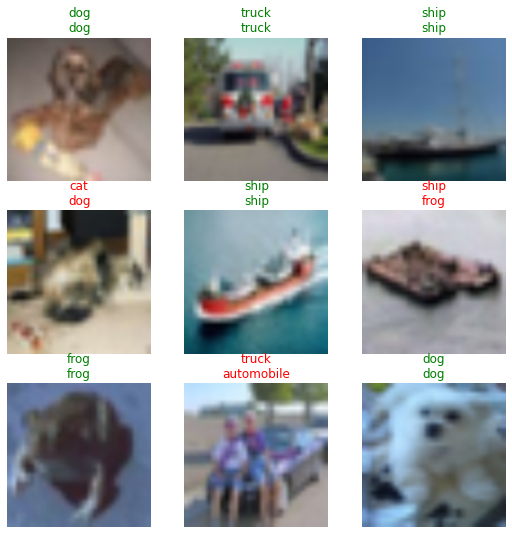

In [ ]:
learn.show_results()

In [ ]:
learn.fine_tune(8,1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.107740,0.159281,0.053700,01:47


epoch,train_loss,valid_loss,error_rate,time
0,0.100626,0.159846,0.053600,01:52
1,0.105583,0.159619,0.052900,01:52
2,0.106776,0.158332,0.054000,01:52
3,0.097965,0.161264,0.054400,01:52
4,0.106917,0.159084,0.053100,01:52
5,0.098695,0.161651,0.053600,01:52
6,0.113710,0.159331,0.053300,01:52
7,0.111090,0.160455,0.053900,01:52


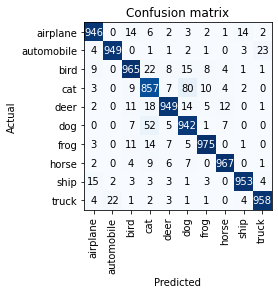

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()